In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load SimLex

In [2]:
simlex = pd.read_csv('./data/MSimLex999_Polish.txt', sep='\t', header=None)
simlex.columns = ['id', 'word1', 'word2', 'similarity', 'relatedness']

In [3]:
simlex

,id,word1,word2,similarity,relatedness
0,1,stary,nowy,0.43,7.29
1,2,bystry,inteligentny,8.86,9.71
2,3,ciężki,trudny,4.86,7.29
3,4,szczęśliwy,radosny,8.14,8.86
4,5,łatwy,męczący,0.43,6.43
...,...,...,...,...,...
994,995,dołączyć,zdobyć,0.43,2.29
995,996,wysyłać,uczestniczyć,0.00,0.86
996,997,zbierać,uczestniczyć,0.00,0.71
997,998,pochłonąć,wycofać,0.00,0.57


## Load embeddings results

In [4]:
emb_results = pd.read_csv('./out/embeddings_results.csv')
emb_results = emb_results[['id', 'word1', 'word2', 'cosinus', 'euclidean']]

In [5]:
emb_results

,id,word1,word2,cosinus,euclidean
0,1,stary,nowy,0.614084,34.195494
1,2,bystry,inteligentny,0.640750,18.516887
2,3,ciężki,trudny,0.727454,24.660319
3,4,szczęśliwy,radosny,0.794668,16.090481
4,5,łatwy,męczący,0.585211,27.133395
...,...,...,...,...,...
962,995,dołączyć,zdobyć,0.657871,25.897192
963,996,wysyłać,uczestniczyć,0.560702,29.530632
964,997,zbierać,uczestniczyć,0.617206,26.957282
965,998,pochłonąć,wycofać,0.720902,21.570204


## Load WordNet results

In [6]:
wn_results = pd.read_csv('./out/wordnet_results.csv')
wn_results = wn_results[['id', 'word1', 'word2', 'wu_palmer', 'leacon']]

In [7]:
wn_results

,id,word1,word2,wu_palmer,leacon
0,2,bystry,inteligentny,0.600000,2.926739
1,3,ciężki,trudny,0.222222,2.233592
2,4,szczęśliwy,radosny,0.200000,2.079442
3,5,łatwy,męczący,0.200000,2.079442
4,6,szybki,gwałtowny,0.250000,2.415914
...,...,...,...,...,...
908,995,dołączyć,zdobyć,0.181818,2.233592
909,996,wysyłać,uczestniczyć,0.200000,2.415914
910,997,zbierać,uczestniczyć,0.222222,2.639057
911,998,pochłonąć,wycofać,0.142857,1.945910


## Merge SimLex with results

In [8]:
results = pd.merge(simlex, emb_results, on=['id', 'word1', 'word2'])

In [9]:
results = pd.merge(results, wn_results, on=['id', 'word1', 'word2'])

In [10]:
results = results.reset_index(inplace=False)

In [11]:
results

,index,id,word1,word2,similarity,relatedness,cosinus,euclidean,wu_palmer,leacon
0,0,2,bystry,inteligentny,8.86,9.71,0.640750,18.516887,0.600000,2.926739
1,1,3,ciężki,trudny,4.86,7.29,0.727454,24.660319,0.222222,2.233592
2,2,4,szczęśliwy,radosny,8.14,8.86,0.794668,16.090481,0.200000,2.079442
3,3,5,łatwy,męczący,0.43,6.43,0.585211,27.133395,0.200000,2.079442
4,4,6,szybki,gwałtowny,3.71,7.00,0.597522,25.573913,0.250000,2.415914
...,...,...,...,...,...,...,...,...,...,...
894,894,995,dołączyć,zdobyć,0.43,2.29,0.657871,25.897192,0.181818,2.233592
895,895,996,wysyłać,uczestniczyć,0.00,0.86,0.560702,29.530632,0.200000,2.415914
896,896,997,zbierać,uczestniczyć,0.00,0.71,0.617206,26.957282,0.222222,2.639057
897,897,998,pochłonąć,wycofać,0.00,0.57,0.720902,21.570204,0.142857,1.945910


## Corelation

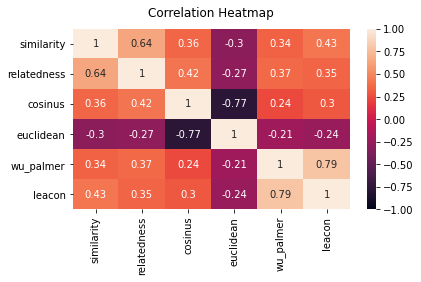

In [12]:
df = results[['similarity', 'relatedness', 'cosinus', 'euclidean', 'wu_palmer', 'leacon']]
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
fig = heatmap.get_figure()
fig.tight_layout(pad=1)
fig.savefig('./out/correlations.jpg', dpi=300)